# Generator

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
import pandas as pd
import time
import os

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import (Dense, Flatten, Reshape,
                                     Conv2D, Conv2DTranspose, LeakyReLU, BatchNormalization, Input)
from tensorflow.keras.datasets import mnist

2024-06-28 05:07:07.283142: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-28 05:07:07.310255: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-28 05:07:07.810422: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
latent_space_size = 10

def get_random_input_vector(latent_space_size, batch_size=1):
    
    #Create an array of the given shape and populate it with random samples from a uniform distribution over [0, 1)
    
    random_vector = np.random.rand(batch_size, latent_space_size)
    
    return random_vector



In [3]:
def make_generator_model(latent_space_size):
    model = keras.Sequential()

    # Input layer
    model.add(Input(shape=(latent_space_size,)))

    # Foundation for 7x7 image
    model.add(Dense(128))
    model.add(LeakyReLU())
    model.add(BatchNormalization())

    model.add(Dense(256))
    model.add(LeakyReLU())
    model.add(BatchNormalization())

    model.add(Dense(512))
    model.add(LeakyReLU())
    model.add(BatchNormalization())

    model.add(Dense(1024))
    model.add(LeakyReLU())
    model.add(BatchNormalization())

    # Reshape to 28x28x1 for MNIST images
    model.add(Dense(28 * 28 * 1, activation='tanh'))
    model.add(Reshape((28, 28, 1)))

    return model

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 784)            │       803,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 28, 28, 1)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,502,608 (5.73 MB)

 Trainable params: 1,498,768 (5.72 MB)

 Non-trainable params: 3,840 (15.00 KB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


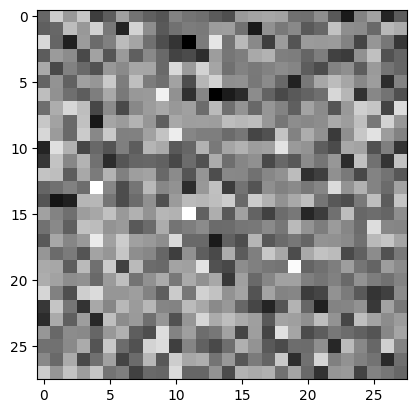

In [4]:
# Create generator model
generator = make_generator_model(latent_space_size)
generator.summary()

# Generate an image using the generator model
random_vector = get_random_input_vector(latent_space_size)
generated_image = generator.predict(random_vector)
plt.imshow(generated_image.reshape(28, 28), cmap='gray')
plt.show()

### Import Mnist dataset

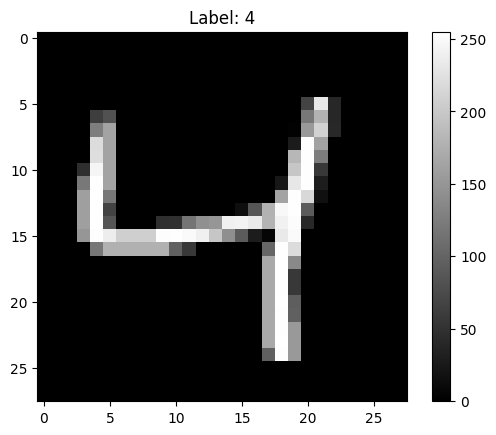

In [5]:
# Charger les données MNIST
digits = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
#digits = [0, 1]

mnist = fetch_openml('mnist_784', version=1)
X = mnist.data  # Utiliser un tout ensemble pour la rapidité
X = X.to_numpy()
y = mnist.target.astype(int)

mask = np.array([l in digits for l in y])
X = X[mask]
y = y[mask]




# Check if X is a DataFrame and convert the first row to a numpy array for visualization
def visualize_image(loc, X, y):
    if isinstance(X, pd.DataFrame):
        image_matrix = X.iloc[loc].values.reshape(28, 28)
        y = y.to_numpy()
    else:
        image_matrix = X[loc].reshape(28, 28)

    # Visualize the image
    plt.imshow(image_matrix, cmap='gray')
    try:
        plt.title(f"Label: {y[loc]}")
    except:
        plt.title('Label: undifined')
    plt.colorbar()
    plt.show()


# Visualize the first image
visualize_image(2, X, y)

In [6]:
type(X)

numpy.ndarray

# Discriminator

In [7]:
def discriminator_model():
    model = keras.Sequential()

    model.add(Input(shape=(28, 28, 1)))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(LeakyReLU())
    model.add(Dense(256))
    model.add(LeakyReLU())
    model.add(Dense(1, activation='sigmoid'))

    return model

In [8]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=False)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)


In [9]:
ones = tf.ones((1, 1))
zeros = tf.zeros((1, 1))

cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)


dis_loss = discriminator_loss(ones, zeros)
gen_loss = generator_loss(zeros)

print('dis_loss', dis_loss)
print('gen_loss', gen_loss)


dis_loss tf.Tensor(1.0064089, shape=(), dtype=float32)
gen_loss tf.Tensor(0.6931472, shape=(), dtype=float32)


In [10]:
generated_image = generator.predict(random_vector)
generated_image.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


(1, 28, 28, 1)

In [11]:
def create_batch_data(size=500, X=None, latent_space_size=latent_space_size):
    batch_real_images = X[:size]
    X = X[size:]
    random_vector = get_random_input_vector(latent_space_size, batch_size=size)
    batch_fake_images = generator.predict(random_vector)
    
    batch_real_images = batch_real_images.reshape(size, 28, 28, 1)

    print('batch_real_images', batch_real_images.shape)
    print('batch_fake_images', batch_fake_images.shape)
    
    batch_data = np.concatenate([batch_real_images, batch_fake_images])
    
    return batch_data, X



In [12]:
batch_data, remaining_data = create_batch_data(500, X, latent_space_size)
batch_data

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
batch_real_images (500, 28, 28, 1)
batch_fake_images (500, 28, 28, 1)


array([[[[ 0.        ],
         [ 0.        ],
         [ 0.        ],
         ...,
         [ 0.        ],
         [ 0.        ],
         [ 0.        ]],

        [[ 0.        ],
         [ 0.        ],
         [ 0.        ],
         ...,
         [ 0.        ],
         [ 0.        ],
         [ 0.        ]],

        [[ 0.        ],
         [ 0.        ],
         [ 0.        ],
         ...,
         [ 0.        ],
         [ 0.        ],
         [ 0.        ]],

        ...,

        [[ 0.        ],
         [ 0.        ],
         [ 0.        ],
         ...,
         [ 0.        ],
         [ 0.        ],
         [ 0.        ]],

        [[ 0.        ],
         [ 0.        ],
         [ 0.        ],
         ...,
         [ 0.        ],
         [ 0.        ],
         [ 0.        ]],

        [[ 0.        ],
         [ 0.        ],
         [ 0.        ],
         ...,
         [ 0.        ],
         [ 0.        ],
         [ 0.        ]]],


       [[[ 0.        ],


In [13]:
# Check the shape of the batch data
print(batch_data.shape)

(1000, 28, 28, 1)


In [14]:
batch_data[0].shape

(28, 28, 1)

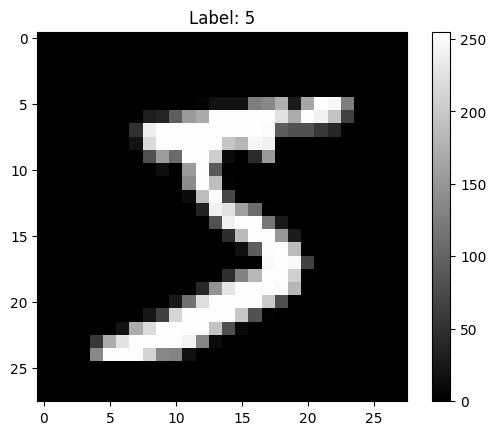

In [15]:
visualize_image(0, batch_data, y)

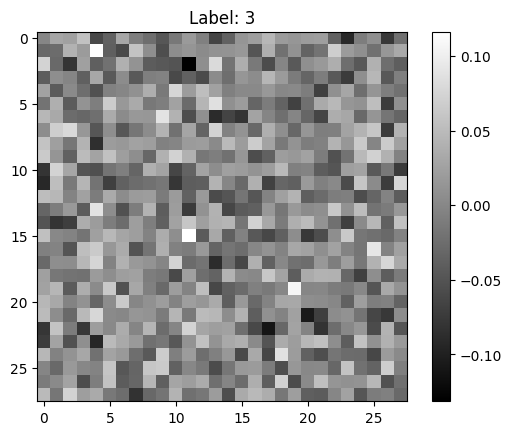

In [16]:
visualize_image(500, batch_data, y)


In [17]:
# Optimizers for the generator and discriminator
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

# Create the discriminator model
discriminator = discriminator_model()
discriminator.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 533,505 (2.04 MB)

 Trainable params: 533,505 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Training step function
@tf.function
def train_step(real_images):
    noise = get_random_input_vector(latent_space_size, batch_size=real_images.shape[0])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(real_images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss

In [19]:
# Adjusted train function to include the save directory and save loss values
def train(dataset, epochs, save_dir, model_save_dir, loss_save_file):
    gen_losses = []
    disc_losses = []

    for epoch in range(epochs):
        for image_batch in dataset:
            gen_loss, disc_loss = train_step(image_batch)

        gen_losses.append(gen_loss)
        disc_losses.append(disc_loss)

        print(f'Epoch {epoch + 1}, Generator Loss: {gen_loss}, Discriminator Loss: {disc_loss}')

        if (epoch + 1) % 10 == 0:
            generate_and_save_images(generator, epoch + 1, get_random_input_vector(latent_space_size), save_dir)
            generator.save(os.path.join(model_save_dir, 'generator_epoch_{:04d}'.format(epoch + 1) + 
                                        'latent_space_size' + str(latent_space_size) + '.h5'))
            discriminator.save(os.path.join(model_save_dir, 'discriminator_epoch_{:04d}.h5'.format(epoch + 1)+ 
                                            'latent_space_size' + str(latent_space_size) + '.h5'))

    generate_and_save_images(generator, epochs, get_random_input_vector(latent_space_size), save_dir)

    # Save the loss values
    np.savez(loss_save_file, gen_losses=gen_losses, disc_losses=disc_losses)


In [20]:
# Helper function to generate and save images in a specific directory
def generate_and_save_images(model, epoch, test_input, save_dir):
    predictions = model(test_input, training=False)

    fig = plt.figure(figsize=(4, 4))

    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i + 1)
        plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
        plt.axis('off')

    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
        
    plt.savefig(os.path.join(save_dir, 'image_at_epoch_{:04d}.png'.format(epoch)))
    plt.show()

In [21]:
# Prepare the dataset
def prepare_dataset(X, batch_size):
    X = X / 255.0  # Normalize the images to [0, 1]
    X = X.reshape(-1, 28, 28, 1).astype('float32')
    dataset = tf.data.Dataset.from_tensor_slices(X).shuffle(60000).batch(batch_size, drop_remainder=True)
    return dataset

/home/duincan/miniconda3/envs/Unsupervised/lib/python3.11/site-packages/keras/src/backend/tensorflow/nn.py:681: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2024-06-28 05:07:17.840048: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 1, Generator Loss: 1.5929266214370728, Discriminator Loss: 0.7593648433685303


2024-06-28 05:07:22.791876: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 2, Generator Loss: 2.2466444969177246, Discriminator Loss: 0.5675737261772156


2024-06-28 05:07:27.749829: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 3, Generator Loss: 3.79952335357666, Discriminator Loss: 0.3478226363658905


2024-06-28 05:07:32.595723: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 4, Generator Loss: 4.318357467651367, Discriminator Loss: 0.17355522513389587


2024-06-28 05:07:37.689729: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 5, Generator Loss: 4.5054121017456055, Discriminator Loss: 0.19338367879390717


2024-06-28 05:07:42.862007: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 6, Generator Loss: 4.827051162719727, Discriminator Loss: 0.15009444952011108


2024-06-28 05:07:47.907527: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 7, Generator Loss: 5.134116172790527, Discriminator Loss: 0.16637000441551208


2024-06-28 05:07:53.077997: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 8, Generator Loss: 7.122535705566406, Discriminator Loss: 0.17909693717956543


2024-06-28 05:07:58.159420: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 9, Generator Loss: 7.149305820465088, Discriminator Loss: 0.06867927312850952
Epoch 10, Generator Loss: 7.0914506912231445, Discriminator Loss: 0.21697238087654114


2024-06-28 05:08:03.229717: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


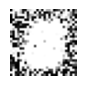

2024-06-28 05:08:08.266185: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 11, Generator Loss: 6.432466983795166, Discriminator Loss: 0.18396607041358948


2024-06-28 05:08:13.324302: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 12, Generator Loss: 6.913320541381836, Discriminator Loss: 0.22423961758613586


2024-06-28 05:08:18.232792: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 13, Generator Loss: 8.469488143920898, Discriminator Loss: 1.2162213325500488


2024-06-28 05:08:23.200807: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 14, Generator Loss: 6.708671569824219, Discriminator Loss: 0.3837124705314636


2024-06-28 05:08:28.124874: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 15, Generator Loss: 9.77273941040039, Discriminator Loss: 0.6325832605361938


2024-06-28 05:08:33.119671: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 16, Generator Loss: 5.477217674255371, Discriminator Loss: 0.6942695379257202


2024-06-28 05:08:38.138068: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 17, Generator Loss: 3.3802196979522705, Discriminator Loss: 0.9566725492477417


2024-06-28 05:08:43.245921: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 18, Generator Loss: 3.362743377685547, Discriminator Loss: 1.027775764465332


2024-06-28 05:08:48.272748: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 19, Generator Loss: 4.089643955230713, Discriminator Loss: 1.177713394165039
Epoch 20, Generator Loss: 3.25272798538208, Discriminator Loss: 0.8451322317123413


2024-06-28 05:08:53.409851: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


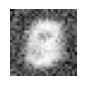

2024-06-28 05:08:58.593601: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 21, Generator Loss: 1.9710607528686523, Discriminator Loss: 1.3126376867294312


2024-06-28 05:09:03.581511: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 22, Generator Loss: 2.414119243621826, Discriminator Loss: 1.2948678731918335


2024-06-28 05:09:08.476333: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 23, Generator Loss: 2.0949411392211914, Discriminator Loss: 1.2392158508300781


2024-06-28 05:09:13.320133: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 24, Generator Loss: 2.5702900886535645, Discriminator Loss: 1.3597806692123413


2024-06-28 05:09:18.295468: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 25, Generator Loss: 2.197540521621704, Discriminator Loss: 1.2225606441497803


2024-06-28 05:09:23.219717: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 26, Generator Loss: 2.0977530479431152, Discriminator Loss: 1.3049108982086182


2024-06-28 05:09:28.148013: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 27, Generator Loss: 1.4946330785751343, Discriminator Loss: 1.6058152914047241


2024-06-28 05:09:33.140979: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 28, Generator Loss: 2.339676856994629, Discriminator Loss: 1.2219743728637695


2024-06-28 05:09:37.904700: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 29, Generator Loss: 1.9619475603103638, Discriminator Loss: 0.9872164726257324
Epoch 30, Generator Loss: 2.2262024879455566, Discriminator Loss: 1.181391716003418


2024-06-28 05:09:42.748748: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


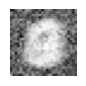

2024-06-28 05:09:47.781603: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 31, Generator Loss: 1.8516440391540527, Discriminator Loss: 1.2726545333862305


2024-06-28 05:09:52.793675: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 32, Generator Loss: 1.7449686527252197, Discriminator Loss: 1.2541630268096924


2024-06-28 05:09:57.735791: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 33, Generator Loss: 1.4065637588500977, Discriminator Loss: 1.395538568496704


2024-06-28 05:10:02.796790: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 34, Generator Loss: 1.6808149814605713, Discriminator Loss: 1.118674874305725


2024-06-28 05:10:07.682078: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 35, Generator Loss: 1.6136313676834106, Discriminator Loss: 1.1753714084625244


2024-06-28 05:10:12.679680: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 36, Generator Loss: 1.4238438606262207, Discriminator Loss: 1.4431021213531494


2024-06-28 05:10:17.568652: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 37, Generator Loss: 1.1385856866836548, Discriminator Loss: 1.6489417552947998


2024-06-28 05:10:23.158433: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 38, Generator Loss: 1.5633180141448975, Discriminator Loss: 1.503771424293518


2024-06-28 05:10:29.991514: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 39, Generator Loss: 2.238344669342041, Discriminator Loss: 0.9921427965164185
Epoch 40, Generator Loss: 1.7956981658935547, Discriminator Loss: 1.2237046957015991


2024-06-28 05:10:34.825145: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


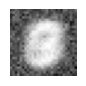

2024-06-28 05:10:39.829631: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 41, Generator Loss: 1.4322240352630615, Discriminator Loss: 1.5481762886047363


2024-06-28 05:10:44.893388: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 42, Generator Loss: 1.444411039352417, Discriminator Loss: 1.184452772140503


2024-06-28 05:10:50.026957: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 43, Generator Loss: 1.7403302192687988, Discriminator Loss: 1.4443328380584717


2024-06-28 05:10:55.229730: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 44, Generator Loss: 1.7454068660736084, Discriminator Loss: 1.3144359588623047


2024-06-28 05:11:00.380275: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 45, Generator Loss: 1.6780881881713867, Discriminator Loss: 1.0891538858413696


2024-06-28 05:11:05.480701: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 46, Generator Loss: 1.8506156206130981, Discriminator Loss: 1.3474243879318237


2024-06-28 05:11:10.605805: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 47, Generator Loss: 1.6565860509872437, Discriminator Loss: 1.1725950241088867


2024-06-28 05:11:15.724545: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 48, Generator Loss: 1.7559430599212646, Discriminator Loss: 1.228450059890747


2024-06-28 05:11:20.757323: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 49, Generator Loss: 1.6632392406463623, Discriminator Loss: 1.2308874130249023
Epoch 50, Generator Loss: 1.5779777765274048, Discriminator Loss: 1.213993787765503


2024-06-28 05:11:25.784326: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


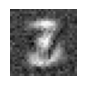

2024-06-28 05:11:30.937471: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 51, Generator Loss: 1.4551525115966797, Discriminator Loss: 1.1857564449310303


2024-06-28 05:11:37.217480: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 52, Generator Loss: 1.5854493379592896, Discriminator Loss: 1.0913106203079224


2024-06-28 05:11:43.511563: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 53, Generator Loss: 1.461706280708313, Discriminator Loss: 1.1985348463058472


2024-06-28 05:11:49.756053: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 54, Generator Loss: 1.3777514696121216, Discriminator Loss: 1.5304467678070068


2024-06-28 05:11:55.949014: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 55, Generator Loss: 1.2577664852142334, Discriminator Loss: 1.3068276643753052


2024-06-28 05:12:02.171486: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 56, Generator Loss: 1.3542507886886597, Discriminator Loss: 1.3860924243927002


2024-06-28 05:12:08.373998: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 57, Generator Loss: 1.3351631164550781, Discriminator Loss: 1.3059051036834717


2024-06-28 05:12:14.574647: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 58, Generator Loss: 1.7933568954467773, Discriminator Loss: 0.9136559963226318


2024-06-28 05:12:21.168820: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 59, Generator Loss: 1.6219666004180908, Discriminator Loss: 1.1185171604156494
Epoch 60, Generator Loss: 1.5764901638031006, Discriminator Loss: 1.1411244869232178


2024-06-28 05:12:25.851745: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


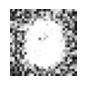

2024-06-28 05:12:30.984194: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 61, Generator Loss: 1.5744563341140747, Discriminator Loss: 1.5244566202163696


2024-06-28 05:12:36.130907: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 62, Generator Loss: 1.9166481494903564, Discriminator Loss: 1.0743062496185303


2024-06-28 05:12:41.225531: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 63, Generator Loss: 1.44215989112854, Discriminator Loss: 1.4343719482421875


2024-06-28 05:12:46.353078: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 64, Generator Loss: 1.4686226844787598, Discriminator Loss: 1.4881980419158936


2024-06-28 05:12:51.484012: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 65, Generator Loss: 1.3414853811264038, Discriminator Loss: 1.3987687826156616


2024-06-28 05:12:56.639394: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 66, Generator Loss: 1.5800449848175049, Discriminator Loss: 1.0011060237884521


2024-06-28 05:13:01.625449: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 67, Generator Loss: 1.315953254699707, Discriminator Loss: 1.7723995447158813


2024-06-28 05:13:06.682927: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 68, Generator Loss: 1.3068053722381592, Discriminator Loss: 1.4273422956466675


2024-06-28 05:13:11.826541: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 69, Generator Loss: 1.6135609149932861, Discriminator Loss: 1.1399471759796143
Epoch 70, Generator Loss: 1.5884355306625366, Discriminator Loss: 1.4586492776870728


2024-06-28 05:13:16.945011: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


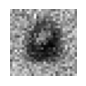

2024-06-28 05:13:22.159230: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 71, Generator Loss: 2.12149977684021, Discriminator Loss: 0.916671872138977


2024-06-28 05:13:27.089881: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 72, Generator Loss: 2.0731301307678223, Discriminator Loss: 1.120595932006836


2024-06-28 05:13:32.194842: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 73, Generator Loss: 1.8593335151672363, Discriminator Loss: 1.3311827182769775


2024-06-28 05:13:37.374117: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 74, Generator Loss: 2.259598731994629, Discriminator Loss: 0.7879011034965515


2024-06-28 05:13:42.433881: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 75, Generator Loss: 1.9449400901794434, Discriminator Loss: 1.3999309539794922


2024-06-28 05:13:47.559642: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 76, Generator Loss: 2.376192331314087, Discriminator Loss: 0.945946216583252


2024-06-28 05:13:52.723071: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 77, Generator Loss: 1.7534160614013672, Discriminator Loss: 0.9088395833969116


2024-06-28 05:13:57.903975: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 78, Generator Loss: 1.8734029531478882, Discriminator Loss: 0.9492599964141846


2024-06-28 05:14:02.983412: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 79, Generator Loss: 2.0249581336975098, Discriminator Loss: 1.1301114559173584
Epoch 80, Generator Loss: 1.6605358123779297, Discriminator Loss: 1.2632139921188354


2024-06-28 05:14:08.070827: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


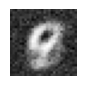

2024-06-28 05:14:13.134373: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 81, Generator Loss: 2.3233695030212402, Discriminator Loss: 1.007117509841919


2024-06-28 05:14:18.346414: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 82, Generator Loss: 2.3608760833740234, Discriminator Loss: 0.9782991409301758


2024-06-28 05:14:23.313314: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 83, Generator Loss: 2.136171340942383, Discriminator Loss: 1.0693061351776123


2024-06-28 05:14:28.405372: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 84, Generator Loss: 2.1748409271240234, Discriminator Loss: 0.9881113767623901


2024-06-28 05:14:33.518332: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 85, Generator Loss: 2.150825262069702, Discriminator Loss: 0.9945770502090454


2024-06-28 05:14:38.626290: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 86, Generator Loss: 2.0548362731933594, Discriminator Loss: 1.0154694318771362


2024-06-28 05:14:43.789128: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 87, Generator Loss: 2.1872172355651855, Discriminator Loss: 0.9699090719223022


2024-06-28 05:14:48.974852: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 88, Generator Loss: 2.404721975326538, Discriminator Loss: 0.8215204477310181


2024-06-28 05:14:53.888343: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 89, Generator Loss: 1.8524547815322876, Discriminator Loss: 1.1224379539489746
Epoch 90, Generator Loss: 2.621994972229004, Discriminator Loss: 0.8701637983322144


2024-06-28 05:14:58.943496: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


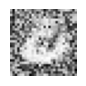

2024-06-28 05:15:04.057879: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 91, Generator Loss: 2.396548271179199, Discriminator Loss: 0.9844158291816711


2024-06-28 05:15:08.600644: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 92, Generator Loss: 2.4686577320098877, Discriminator Loss: 0.9553235769271851


2024-06-28 05:15:13.465993: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 93, Generator Loss: 2.5389554500579834, Discriminator Loss: 0.9166930913925171


2024-06-28 05:15:18.435324: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 94, Generator Loss: 2.3121938705444336, Discriminator Loss: 0.8297556638717651


2024-06-28 05:15:23.486455: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 95, Generator Loss: 2.674175262451172, Discriminator Loss: 0.8135970830917358


2024-06-28 05:15:28.664723: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 96, Generator Loss: 2.7686715126037598, Discriminator Loss: 0.9689217805862427


2024-06-28 05:15:33.515813: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 97, Generator Loss: 2.7948217391967773, Discriminator Loss: 1.0346975326538086


2024-06-28 05:15:38.570627: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 98, Generator Loss: 2.4686620235443115, Discriminator Loss: 0.8002029657363892


2024-06-28 05:15:43.483371: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 99, Generator Loss: 2.3314037322998047, Discriminator Loss: 0.9493280649185181
Epoch 100, Generator Loss: 2.373000383377075, Discriminator Loss: 0.8843648433685303


2024-06-28 05:15:48.448724: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


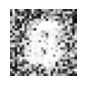

2024-06-28 05:15:53.646052: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 101, Generator Loss: 2.558257579803467, Discriminator Loss: 0.8401584625244141


2024-06-28 05:15:58.670081: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 102, Generator Loss: 3.11023211479187, Discriminator Loss: 0.9125027656555176


2024-06-28 05:16:03.695840: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 103, Generator Loss: 3.1451802253723145, Discriminator Loss: 0.8548714518547058


2024-06-28 05:16:08.772097: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 104, Generator Loss: 2.303331136703491, Discriminator Loss: 0.9923232793807983


2024-06-28 05:16:13.494609: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 105, Generator Loss: 2.8667495250701904, Discriminator Loss: 0.7874988317489624


2024-06-28 05:16:18.441045: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 106, Generator Loss: 2.995144844055176, Discriminator Loss: 0.7615377306938171


2024-06-28 05:16:23.537070: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 107, Generator Loss: 3.018731117248535, Discriminator Loss: 0.7354493141174316


2024-06-28 05:16:28.648521: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 108, Generator Loss: 3.1399600505828857, Discriminator Loss: 0.7368992567062378


2024-06-28 05:16:33.650236: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 109, Generator Loss: 2.949397325515747, Discriminator Loss: 0.8363174200057983
Epoch 110, Generator Loss: 3.250739812850952, Discriminator Loss: 0.703345775604248


2024-06-28 05:16:38.625419: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


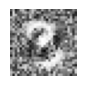

2024-06-28 05:16:43.639015: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 111, Generator Loss: 3.7147998809814453, Discriminator Loss: 0.6773351430892944


2024-06-28 05:16:48.673739: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 112, Generator Loss: 3.316696882247925, Discriminator Loss: 0.8328517079353333


2024-06-28 05:16:53.658509: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 113, Generator Loss: 2.977546215057373, Discriminator Loss: 0.679158627986908


2024-06-28 05:16:58.663947: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 114, Generator Loss: 3.322084903717041, Discriminator Loss: 0.8169058561325073


2024-06-28 05:17:03.658073: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 115, Generator Loss: 3.5729312896728516, Discriminator Loss: 0.6560548543930054


2024-06-28 05:17:08.660369: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 116, Generator Loss: 3.104135036468506, Discriminator Loss: 0.6716606020927429


2024-06-28 05:17:13.522364: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 117, Generator Loss: 3.243669033050537, Discriminator Loss: 0.9419448375701904


2024-06-28 05:17:18.302179: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 118, Generator Loss: 3.1001477241516113, Discriminator Loss: 0.9264810085296631


2024-06-28 05:17:22.776467: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 119, Generator Loss: 3.2936010360717773, Discriminator Loss: 0.7477842569351196
Epoch 120, Generator Loss: 3.7335429191589355, Discriminator Loss: 0.7158242464065552


2024-06-28 05:17:27.859472: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


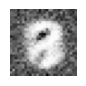

2024-06-28 05:17:33.040454: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 121, Generator Loss: 3.045785903930664, Discriminator Loss: 0.8477597236633301


2024-06-28 05:17:38.121071: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 122, Generator Loss: 3.7151618003845215, Discriminator Loss: 0.7514563202857971


2024-06-28 05:17:43.233134: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 123, Generator Loss: 3.7221732139587402, Discriminator Loss: 0.6825106143951416


2024-06-28 05:17:48.093518: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 124, Generator Loss: 2.5073201656341553, Discriminator Loss: 1.0099035501480103


2024-06-28 05:17:52.989440: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 125, Generator Loss: 2.899639844894409, Discriminator Loss: 0.9154577851295471


2024-06-28 05:17:57.977664: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 126, Generator Loss: 2.7210121154785156, Discriminator Loss: 0.6966597437858582


2024-06-28 05:18:03.005317: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 127, Generator Loss: 3.4622645378112793, Discriminator Loss: 0.8214880228042603


2024-06-28 05:18:08.122095: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 128, Generator Loss: 3.5887248516082764, Discriminator Loss: 0.6736786365509033


2024-06-28 05:18:13.365439: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 129, Generator Loss: 3.4683024883270264, Discriminator Loss: 0.8798748850822449
Epoch 130, Generator Loss: 3.525506019592285, Discriminator Loss: 1.1129324436187744


2024-06-28 05:18:18.573202: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


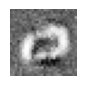

2024-06-28 05:18:23.792325: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 131, Generator Loss: 3.5534491539001465, Discriminator Loss: 0.8980110287666321


2024-06-28 05:18:28.791835: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 132, Generator Loss: 3.183030128479004, Discriminator Loss: 0.785805881023407


2024-06-28 05:18:33.826393: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 133, Generator Loss: 3.2029149532318115, Discriminator Loss: 0.7742409706115723


2024-06-28 05:18:38.907092: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 134, Generator Loss: 3.5415096282958984, Discriminator Loss: 0.8453969955444336


2024-06-28 05:18:43.784756: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 135, Generator Loss: 3.777320384979248, Discriminator Loss: 0.7466617822647095


2024-06-28 05:18:48.507449: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 136, Generator Loss: 4.221109390258789, Discriminator Loss: 0.6428308486938477


2024-06-28 05:18:53.515263: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 137, Generator Loss: 3.4448118209838867, Discriminator Loss: 0.8647300004959106


2024-06-28 05:18:58.545270: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 138, Generator Loss: 3.3699631690979004, Discriminator Loss: 0.5744004249572754


2024-06-28 05:19:03.461500: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 139, Generator Loss: 3.83967924118042, Discriminator Loss: 0.7914533615112305
Epoch 140, Generator Loss: 3.8633811473846436, Discriminator Loss: 0.5632548928260803


2024-06-28 05:19:08.441405: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


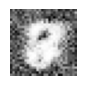

2024-06-28 05:19:13.475263: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 141, Generator Loss: 2.824077606201172, Discriminator Loss: 0.8536771535873413


2024-06-28 05:19:18.495726: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 142, Generator Loss: 3.3781256675720215, Discriminator Loss: 0.6276242733001709


2024-06-28 05:19:23.479497: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 143, Generator Loss: 3.9969687461853027, Discriminator Loss: 0.618477463722229


2024-06-28 05:19:28.571811: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 144, Generator Loss: 2.9232735633850098, Discriminator Loss: 0.5434337854385376


2024-06-28 05:19:33.582588: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 145, Generator Loss: 3.1383919715881348, Discriminator Loss: 0.7142984867095947


2024-06-28 05:19:38.690142: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 146, Generator Loss: 2.9436001777648926, Discriminator Loss: 0.7792243361473083


2024-06-28 05:19:43.240914: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 147, Generator Loss: 3.679729700088501, Discriminator Loss: 0.5817611217498779


2024-06-28 05:19:47.998297: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 148, Generator Loss: 4.046442985534668, Discriminator Loss: 0.6117696166038513


2024-06-28 05:19:52.920453: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 149, Generator Loss: 3.921250343322754, Discriminator Loss: 0.573752224445343
Epoch 150, Generator Loss: 3.5650794506073, Discriminator Loss: 0.6388549208641052


2024-06-28 05:19:57.990391: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


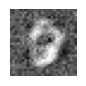

2024-06-28 05:20:03.100110: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 151, Generator Loss: 4.104239463806152, Discriminator Loss: 0.5705739259719849


2024-06-28 05:20:08.217487: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 152, Generator Loss: 3.974688768386841, Discriminator Loss: 0.6352688074111938


2024-06-28 05:20:13.380682: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 153, Generator Loss: 3.6651875972747803, Discriminator Loss: 0.5312761664390564


2024-06-28 05:20:18.454232: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 154, Generator Loss: 3.0487074851989746, Discriminator Loss: 0.5907975435256958


2024-06-28 05:20:23.592185: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 155, Generator Loss: 3.3494505882263184, Discriminator Loss: 0.7485954761505127


2024-06-28 05:20:28.720178: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 156, Generator Loss: 4.316963195800781, Discriminator Loss: 0.4385756254196167


2024-06-28 05:20:33.854961: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 157, Generator Loss: 3.1655967235565186, Discriminator Loss: 0.7122567892074585


2024-06-28 05:20:38.953502: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 158, Generator Loss: 4.316118240356445, Discriminator Loss: 0.5529193878173828


2024-06-28 05:20:44.081440: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 159, Generator Loss: 4.355900764465332, Discriminator Loss: 0.5768358707427979
Epoch 160, Generator Loss: 3.756519317626953, Discriminator Loss: 0.6216683387756348


2024-06-28 05:20:49.234829: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


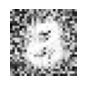

2024-06-28 05:20:54.343907: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 161, Generator Loss: 4.381391525268555, Discriminator Loss: 0.6268917322158813


2024-06-28 05:20:59.488910: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 162, Generator Loss: 3.4887428283691406, Discriminator Loss: 0.6655126214027405


2024-06-28 05:21:04.604828: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 163, Generator Loss: 3.5014238357543945, Discriminator Loss: 0.7048821449279785


2024-06-28 05:21:09.705483: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 164, Generator Loss: 3.512463092803955, Discriminator Loss: 0.5420365929603577


2024-06-28 05:21:14.766354: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 165, Generator Loss: 3.816671133041382, Discriminator Loss: 0.6509724855422974


2024-06-28 05:21:19.922462: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 166, Generator Loss: 3.9849510192871094, Discriminator Loss: 0.4270966649055481


2024-06-28 05:21:25.098582: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 167, Generator Loss: 3.2007827758789062, Discriminator Loss: 0.6705904006958008


2024-06-28 05:21:30.208682: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 168, Generator Loss: 3.6351306438446045, Discriminator Loss: 0.747390627861023


2024-06-28 05:21:35.163566: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 169, Generator Loss: 3.486419200897217, Discriminator Loss: 0.842908501625061
Epoch 170, Generator Loss: 4.229910850524902, Discriminator Loss: 0.5809513330459595


2024-06-28 05:21:40.285601: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


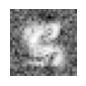

2024-06-28 05:21:44.881990: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 171, Generator Loss: 3.889953136444092, Discriminator Loss: 0.6316509246826172


2024-06-28 05:21:49.826510: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 172, Generator Loss: 3.6489779949188232, Discriminator Loss: 0.6844120621681213


2024-06-28 05:21:54.732860: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 173, Generator Loss: 3.952087163925171, Discriminator Loss: 0.5316477417945862


2024-06-28 05:21:59.763832: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 174, Generator Loss: 3.739591360092163, Discriminator Loss: 0.7142187356948853


2024-06-28 05:22:04.873416: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 175, Generator Loss: 3.6770474910736084, Discriminator Loss: 0.6188583374023438


2024-06-28 05:22:09.990453: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 176, Generator Loss: 3.623152256011963, Discriminator Loss: 0.6274332404136658


2024-06-28 05:22:14.996863: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 177, Generator Loss: 4.670515060424805, Discriminator Loss: 0.61100172996521


2024-06-28 05:22:19.978616: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 178, Generator Loss: 4.069515705108643, Discriminator Loss: 0.7473189830780029


2024-06-28 05:22:24.941471: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 179, Generator Loss: 3.9859280586242676, Discriminator Loss: 0.6365334987640381
Epoch 180, Generator Loss: 4.011951446533203, Discriminator Loss: 0.4865085482597351


2024-06-28 05:22:29.952092: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


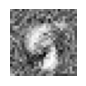

2024-06-28 05:22:35.030779: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 181, Generator Loss: 4.4582014083862305, Discriminator Loss: 0.5534987449645996


2024-06-28 05:22:39.698314: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 182, Generator Loss: 3.9645607471466064, Discriminator Loss: 0.5784424543380737


2024-06-28 05:22:44.692632: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 183, Generator Loss: 3.8772382736206055, Discriminator Loss: 0.7661629915237427


2024-06-28 05:22:49.622815: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 184, Generator Loss: 3.8626325130462646, Discriminator Loss: 0.7010927200317383


2024-06-28 05:22:54.723136: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 185, Generator Loss: 3.3844144344329834, Discriminator Loss: 0.6239560842514038


2024-06-28 05:22:59.771693: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 186, Generator Loss: 3.57820200920105, Discriminator Loss: 0.6707375049591064


2024-06-28 05:23:04.880455: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 187, Generator Loss: 4.042583465576172, Discriminator Loss: 0.5806944370269775


2024-06-28 05:23:09.958470: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 188, Generator Loss: 3.8642501831054688, Discriminator Loss: 0.5561310052871704


2024-06-28 05:23:14.999819: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 189, Generator Loss: 3.8589203357696533, Discriminator Loss: 0.8740150928497314
Epoch 190, Generator Loss: 4.489322662353516, Discriminator Loss: 0.7256489992141724


2024-06-28 05:23:20.123198: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


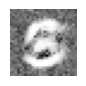

2024-06-28 05:23:25.014994: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 191, Generator Loss: 4.026383399963379, Discriminator Loss: 0.7011472582817078


2024-06-28 05:23:29.964825: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 192, Generator Loss: 4.272924900054932, Discriminator Loss: 0.605186402797699


2024-06-28 05:23:35.105218: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 193, Generator Loss: 4.094293594360352, Discriminator Loss: 0.5731449127197266


2024-06-28 05:23:40.203125: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 194, Generator Loss: 4.352021217346191, Discriminator Loss: 0.552485466003418


2024-06-28 05:23:44.838353: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 195, Generator Loss: 3.5109009742736816, Discriminator Loss: 0.5941699147224426


2024-06-28 05:23:49.799031: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 196, Generator Loss: 3.5090880393981934, Discriminator Loss: 0.7100429534912109


2024-06-28 05:23:54.803675: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 197, Generator Loss: 3.8618733882904053, Discriminator Loss: 0.7470566630363464


2024-06-28 05:23:59.857364: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 198, Generator Loss: 3.7604618072509766, Discriminator Loss: 0.7954749464988708


2024-06-28 05:24:04.917657: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 199, Generator Loss: 4.151394367218018, Discriminator Loss: 0.7385074496269226
Epoch 200, Generator Loss: 4.102225303649902, Discriminator Loss: 0.5660333037376404


2024-06-28 05:24:09.842445: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


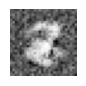

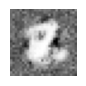

In [22]:
# Prepare the MNIST dataset
batch_size = 256
mnist_dataset = prepare_dataset(X, batch_size)

# Train the GAN
epochs = 200

# Define the directory where images will be saved
save_directory = 'training_images_' + str(epochs) + '_epochs_time_' + str(int(time.time()))

model_save_directory = 'saved_models'
loss_save_file = 'training_losses.npz'

# Create the directories if they don't exist
if not os.path.exists(model_save_directory):
    os.makedirs(model_save_directory)
    


train(mnist_dataset, epochs, save_directory, model_save_directory, loss_save_file)


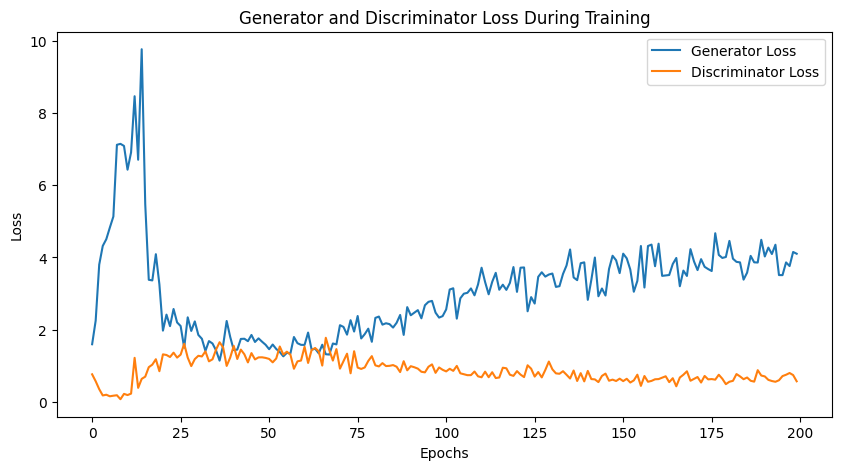

In [23]:
# Function to load and plot the losses
def plot_losses(loss_file):
    data = np.load(loss_file)
    gen_losses = data['gen_losses']
    disc_losses = data['disc_losses']

    plt.figure(figsize=(10, 5))
    plt.plot(gen_losses, label='Generator Loss')
    plt.plot(disc_losses, label='Discriminator Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Generator and Discriminator Loss During Training')
    plt.show()

# Plot the losses after training
plot_losses(loss_save_file)

In [24]:
# Function to generate and display images using the trained generator model
def generate_images(generator_model, num_images, latent_space_size):
    random_vectors = get_random_input_vector(latent_space_size, batch_size=num_images)
    generated_images = generator_model(random_vectors, training=False)

    fig = plt.figure(figsize=(10, 10))

    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(generated_images[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
        plt.axis('off')

    plt.show()

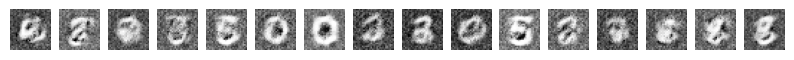

In [27]:
num_images_to_generate = 16

generator = keras.models.load_model('saved_models/generator_epoch_0200latent_space_size10.h5')


generate_images(generator, num_images_to_generate, latent_space_size)


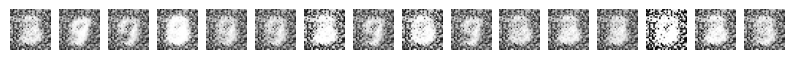

In [28]:
# Load the trained generator model
generator = keras.models.load_model('saved_models/generator_epoch_0060latent_space_size10.h5')

# Generate and display images
num_images_to_generate = 16
latent_space_size = 10  # Define the latent space size used during training
generate_images(generator, num_images_to_generate, latent_space_size)

In [29]:
latent_space_size = 2

# Optimizers for the generator and discriminator
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

# Create the discriminator model
discriminator = discriminator_model()
discriminator.summary()

# Create the generator model with the new latent space size
generator = make_generator_model(latent_space_size)
generator.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 533,505 (2.04 MB)

 Trainable params: 533,505 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_9 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_10 (LeakyReLU)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_11 (LeakyReLU)      │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 784)            │       803,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 28, 28, 1)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,501,584 (5.73 MB)

 Trainable params: 1,497,744 (5.71 MB)

 Non-trainable params: 3,840 (15.00 KB)

2024-06-28 05:26:07.548975: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 1, Generator Loss: 3.71742582321167, Discriminator Loss: 0.6228472590446472


2024-06-28 05:26:12.593169: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 2, Generator Loss: 3.6999828815460205, Discriminator Loss: 0.7669667601585388


2024-06-28 05:26:17.512553: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 3, Generator Loss: 3.3568272590637207, Discriminator Loss: 0.6262050271034241


2024-06-28 05:26:22.505294: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 4, Generator Loss: 3.2677600383758545, Discriminator Loss: 0.6734974384307861


2024-06-28 05:26:27.506781: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 5, Generator Loss: 3.347506284713745, Discriminator Loss: 0.5194251537322998


2024-06-28 05:26:32.527980: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 6, Generator Loss: 3.3783655166625977, Discriminator Loss: 0.6043592691421509


2024-06-28 05:26:37.660155: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 7, Generator Loss: 3.8715455532073975, Discriminator Loss: 0.5032696723937988


2024-06-28 05:26:42.744016: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 8, Generator Loss: 3.828885078430176, Discriminator Loss: 0.4865652024745941


2024-06-28 05:26:47.891692: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 9, Generator Loss: 3.3218441009521484, Discriminator Loss: 0.5693649649620056
Epoch 10, Generator Loss: 3.567012310028076, Discriminator Loss: 0.721062958240509


2024-06-28 05:26:53.009615: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


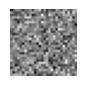

2024-06-28 05:26:58.089193: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 11, Generator Loss: 3.5049843788146973, Discriminator Loss: 0.6805935502052307


2024-06-28 05:27:03.086781: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 12, Generator Loss: 3.2546801567077637, Discriminator Loss: 0.6384698152542114


2024-06-28 05:27:08.030589: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 13, Generator Loss: 3.3115086555480957, Discriminator Loss: 0.6466895341873169


2024-06-28 05:27:13.058981: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 14, Generator Loss: 3.4185142517089844, Discriminator Loss: 0.6511595249176025


2024-06-28 05:27:18.153641: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 15, Generator Loss: 3.7204978466033936, Discriminator Loss: 0.6800711154937744


2024-06-28 05:27:23.260543: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 16, Generator Loss: 3.023857593536377, Discriminator Loss: 0.6588451266288757


2024-06-28 05:27:28.275035: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 17, Generator Loss: 3.6536476612091064, Discriminator Loss: 0.70805823802948


2024-06-28 05:27:33.396972: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 18, Generator Loss: 3.781130790710449, Discriminator Loss: 0.7246108055114746


2024-06-28 05:27:38.538614: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 19, Generator Loss: 3.9226114749908447, Discriminator Loss: 0.8440647125244141
Epoch 20, Generator Loss: 3.6395978927612305, Discriminator Loss: 0.5096526145935059


2024-06-28 05:27:43.713642: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


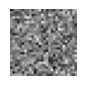

2024-06-28 05:27:48.813374: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 21, Generator Loss: 3.546741247177124, Discriminator Loss: 0.5612166523933411


2024-06-28 05:27:53.989067: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 22, Generator Loss: 3.8783979415893555, Discriminator Loss: 0.5444996356964111


2024-06-28 05:27:59.035451: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 23, Generator Loss: 3.9795637130737305, Discriminator Loss: 0.5617408752441406


2024-06-28 05:28:03.957270: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 24, Generator Loss: 4.276893615722656, Discriminator Loss: 0.6673518419265747


2024-06-28 05:28:09.100092: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 25, Generator Loss: 4.2227463722229, Discriminator Loss: 0.5703029632568359


2024-06-28 05:28:14.130521: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 26, Generator Loss: 3.6638779640197754, Discriminator Loss: 0.6600164175033569


2024-06-28 05:28:19.375013: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 27, Generator Loss: 3.333127021789551, Discriminator Loss: 0.7573400735855103


2024-06-28 05:28:24.396291: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 28, Generator Loss: 3.3947057723999023, Discriminator Loss: 0.7189732789993286


2024-06-28 05:28:29.387327: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 29, Generator Loss: 3.0711472034454346, Discriminator Loss: 0.7146868705749512
Epoch 30, Generator Loss: 2.923635959625244, Discriminator Loss: 0.648064911365509


2024-06-28 05:28:34.386276: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


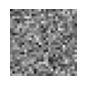

2024-06-28 05:28:39.471885: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 31, Generator Loss: 3.1096572875976562, Discriminator Loss: 0.8004520535469055


2024-06-28 05:28:44.561337: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 32, Generator Loss: 3.3480911254882812, Discriminator Loss: 0.6392325162887573


2024-06-28 05:28:49.686782: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 33, Generator Loss: 3.684596300125122, Discriminator Loss: 0.6549266576766968


2024-06-28 05:28:54.737833: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 34, Generator Loss: 3.688157320022583, Discriminator Loss: 0.7137441039085388


2024-06-28 05:28:59.841638: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 35, Generator Loss: 3.6333727836608887, Discriminator Loss: 0.791492760181427


2024-06-28 05:29:04.756089: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 36, Generator Loss: 3.743453025817871, Discriminator Loss: 0.6771514415740967


2024-06-28 05:29:09.779888: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 37, Generator Loss: 3.5622124671936035, Discriminator Loss: 0.7625301480293274


2024-06-28 05:29:14.735950: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 38, Generator Loss: 3.4800240993499756, Discriminator Loss: 0.7619127035140991


2024-06-28 05:29:19.733461: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 39, Generator Loss: 3.631516456604004, Discriminator Loss: 0.8166586756706238
Epoch 40, Generator Loss: 3.9941515922546387, Discriminator Loss: 0.7872640490531921


2024-06-28 05:29:24.649410: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


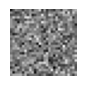

2024-06-28 05:29:29.698084: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 41, Generator Loss: 3.366607666015625, Discriminator Loss: 0.9390026926994324


2024-06-28 05:29:34.791954: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 42, Generator Loss: 3.682774543762207, Discriminator Loss: 0.751131534576416


2024-06-28 05:29:39.963357: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 43, Generator Loss: 3.249711036682129, Discriminator Loss: 0.7902182340621948


2024-06-28 05:29:45.012751: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 44, Generator Loss: 3.3153152465820312, Discriminator Loss: 0.7299069166183472


2024-06-28 05:29:50.056670: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 45, Generator Loss: 3.213905096054077, Discriminator Loss: 0.6663845181465149


2024-06-28 05:29:55.095792: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 46, Generator Loss: 3.3034510612487793, Discriminator Loss: 0.7321400046348572


2024-06-28 05:30:00.203035: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 47, Generator Loss: 3.6492066383361816, Discriminator Loss: 0.7822023630142212


2024-06-28 05:30:05.330594: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 48, Generator Loss: 3.6316747665405273, Discriminator Loss: 0.6386613249778748


2024-06-28 05:30:10.154078: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 49, Generator Loss: 3.407578945159912, Discriminator Loss: 0.7052858471870422
Epoch 50, Generator Loss: 3.6277618408203125, Discriminator Loss: 0.586292028427124


2024-06-28 05:30:15.166136: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


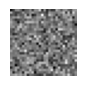

2024-06-28 05:30:20.169324: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 51, Generator Loss: 3.1448981761932373, Discriminator Loss: 0.7239022850990295


2024-06-28 05:30:25.199471: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 52, Generator Loss: 3.235654830932617, Discriminator Loss: 0.6186462640762329


2024-06-28 05:30:30.329249: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 53, Generator Loss: 2.828794240951538, Discriminator Loss: 0.7907598614692688


2024-06-28 05:30:35.432172: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 54, Generator Loss: 3.597799301147461, Discriminator Loss: 0.652045726776123


2024-06-28 05:30:40.710424: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 55, Generator Loss: 3.646352529525757, Discriminator Loss: 0.6001033782958984


2024-06-28 05:30:45.860877: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 56, Generator Loss: 3.4697060585021973, Discriminator Loss: 0.6837586164474487


2024-06-28 05:30:50.838541: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 57, Generator Loss: 3.2620162963867188, Discriminator Loss: 0.7818244695663452


2024-06-28 05:30:55.876035: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 58, Generator Loss: 2.913682460784912, Discriminator Loss: 0.8411858677864075


2024-06-28 05:31:00.843013: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 59, Generator Loss: 3.368473768234253, Discriminator Loss: 0.7755109667778015
Epoch 60, Generator Loss: 3.2873494625091553, Discriminator Loss: 0.6688162684440613


2024-06-28 05:31:05.967019: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


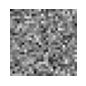

2024-06-28 05:31:11.046179: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 61, Generator Loss: 3.2404422760009766, Discriminator Loss: 0.6326772570610046


2024-06-28 05:31:16.115162: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 62, Generator Loss: 3.3878870010375977, Discriminator Loss: 0.5111202001571655


2024-06-28 05:31:21.158228: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 63, Generator Loss: 3.473292589187622, Discriminator Loss: 0.728227972984314


2024-06-28 05:31:26.297362: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 64, Generator Loss: 3.285524368286133, Discriminator Loss: 0.738600492477417


2024-06-28 05:31:31.374223: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 65, Generator Loss: 3.271756649017334, Discriminator Loss: 0.8155083656311035


2024-06-28 05:31:36.372707: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 66, Generator Loss: 3.6141836643218994, Discriminator Loss: 0.6087899208068848


2024-06-28 05:31:41.450570: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 67, Generator Loss: 3.751728057861328, Discriminator Loss: 0.5867124199867249


2024-06-28 05:31:46.580480: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 68, Generator Loss: 3.184617042541504, Discriminator Loss: 0.7056013345718384


2024-06-28 05:31:51.703554: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 69, Generator Loss: 2.8647894859313965, Discriminator Loss: 0.855019211769104
Epoch 70, Generator Loss: 3.1578588485717773, Discriminator Loss: 0.8758441805839539


2024-06-28 05:31:56.691406: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


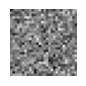

2024-06-28 05:32:01.647950: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 71, Generator Loss: 2.795654296875, Discriminator Loss: 0.9983723163604736


2024-06-28 05:32:06.733989: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 72, Generator Loss: 2.94708514213562, Discriminator Loss: 0.9035733938217163


2024-06-28 05:32:11.796369: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 73, Generator Loss: 2.9508132934570312, Discriminator Loss: 0.7207834720611572


2024-06-28 05:32:16.962483: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 74, Generator Loss: 3.2035646438598633, Discriminator Loss: 0.755767822265625


2024-06-28 05:32:22.051940: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 75, Generator Loss: 3.3169925212860107, Discriminator Loss: 0.6777225136756897


2024-06-28 05:32:27.079066: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 76, Generator Loss: 3.259657621383667, Discriminator Loss: 0.9241856932640076


2024-06-28 05:32:32.188928: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 77, Generator Loss: 3.0470407009124756, Discriminator Loss: 0.7672698497772217


2024-06-28 05:32:37.273001: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 78, Generator Loss: 3.0551986694335938, Discriminator Loss: 0.907524824142456


2024-06-28 05:32:42.301656: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 79, Generator Loss: 3.428727626800537, Discriminator Loss: 0.8645176291465759
Epoch 80, Generator Loss: 2.912510633468628, Discriminator Loss: 0.9004862904548645


2024-06-28 05:32:47.309366: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


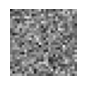

2024-06-28 05:32:52.240854: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 81, Generator Loss: 3.4388206005096436, Discriminator Loss: 0.6291011571884155


2024-06-28 05:32:57.320252: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 82, Generator Loss: 3.9270424842834473, Discriminator Loss: 0.6109023690223694


2024-06-28 05:33:02.489564: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 83, Generator Loss: 3.4619956016540527, Discriminator Loss: 0.6708820462226868


2024-06-28 05:33:07.594576: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 84, Generator Loss: 3.321458578109741, Discriminator Loss: 0.7942967414855957


2024-06-28 05:33:12.707386: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 85, Generator Loss: 3.529785633087158, Discriminator Loss: 0.7084075808525085


2024-06-28 05:33:17.789724: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 86, Generator Loss: 3.1172561645507812, Discriminator Loss: 0.7283844947814941


2024-06-28 05:33:22.827419: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 87, Generator Loss: 3.431769847869873, Discriminator Loss: 0.7706507444381714


2024-06-28 05:33:27.778157: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 88, Generator Loss: 3.407292366027832, Discriminator Loss: 0.7614627480506897


2024-06-28 05:33:32.811482: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 89, Generator Loss: 3.4772424697875977, Discriminator Loss: 0.6371793150901794
Epoch 90, Generator Loss: 3.2044754028320312, Discriminator Loss: 0.7812852263450623


2024-06-28 05:33:37.845619: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


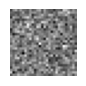

2024-06-28 05:33:42.904301: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 91, Generator Loss: 2.724255084991455, Discriminator Loss: 0.8071571588516235


2024-06-28 05:33:47.500750: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 92, Generator Loss: 2.9171876907348633, Discriminator Loss: 0.7987310886383057


2024-06-28 05:33:52.025583: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 93, Generator Loss: 3.2678709030151367, Discriminator Loss: 0.8672153949737549


2024-06-28 05:33:56.878548: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 94, Generator Loss: 3.157898426055908, Discriminator Loss: 0.8345249891281128


2024-06-28 05:34:01.958491: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 95, Generator Loss: 3.1332621574401855, Discriminator Loss: 0.8406966924667358


2024-06-28 05:34:06.617263: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 96, Generator Loss: 2.844055414199829, Discriminator Loss: 0.8455156087875366


2024-06-28 05:34:11.649446: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 97, Generator Loss: 3.7373275756835938, Discriminator Loss: 0.8277746438980103


2024-06-28 05:34:16.731309: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 98, Generator Loss: 3.529024839401245, Discriminator Loss: 0.8261469602584839


2024-06-28 05:34:21.593561: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 99, Generator Loss: 3.4051201343536377, Discriminator Loss: 0.6601352691650391
Epoch 100, Generator Loss: 3.4448156356811523, Discriminator Loss: 0.7335999608039856


2024-06-28 05:34:26.727772: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


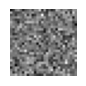

2024-06-28 05:34:31.839463: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 101, Generator Loss: 3.560957908630371, Discriminator Loss: 0.6712338328361511


2024-06-28 05:34:36.925871: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 102, Generator Loss: 3.2248928546905518, Discriminator Loss: 0.8036966323852539


2024-06-28 05:34:41.984602: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 103, Generator Loss: 2.9803290367126465, Discriminator Loss: 0.6978898644447327


2024-06-28 05:34:47.089441: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 104, Generator Loss: 2.8983538150787354, Discriminator Loss: 0.9150949120521545


2024-06-28 05:34:51.917114: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 105, Generator Loss: 2.6967382431030273, Discriminator Loss: 0.8788086175918579


2024-06-28 05:34:56.622394: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 106, Generator Loss: 2.788597822189331, Discriminator Loss: 0.7872296571731567


2024-06-28 05:35:00.867303: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 107, Generator Loss: 3.1602752208709717, Discriminator Loss: 0.707555890083313


2024-06-28 05:35:05.448270: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 108, Generator Loss: 3.1419384479522705, Discriminator Loss: 0.7252580523490906


2024-06-28 05:35:10.153203: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 109, Generator Loss: 3.1867873668670654, Discriminator Loss: 0.6997038125991821
Epoch 110, Generator Loss: 3.121032476425171, Discriminator Loss: 0.7288560271263123


2024-06-28 05:35:14.880435: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


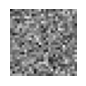

2024-06-28 05:35:19.428878: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 111, Generator Loss: 3.518771171569824, Discriminator Loss: 0.7628695368766785


2024-06-28 05:35:23.941449: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 112, Generator Loss: 3.139193058013916, Discriminator Loss: 0.6533270478248596


2024-06-28 05:35:28.311109: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 113, Generator Loss: 3.5510454177856445, Discriminator Loss: 0.7660217881202698


2024-06-28 05:35:33.272928: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 114, Generator Loss: 3.4972970485687256, Discriminator Loss: 0.6526634693145752


2024-06-28 05:35:38.368755: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 115, Generator Loss: 3.58565092086792, Discriminator Loss: 0.7147052884101868


2024-06-28 05:35:43.434510: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 116, Generator Loss: 3.018000841140747, Discriminator Loss: 0.7436756491661072


2024-06-28 05:35:48.516907: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 117, Generator Loss: 2.9541776180267334, Discriminator Loss: 0.7728424072265625


2024-06-28 05:35:53.353532: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 118, Generator Loss: 3.4283294677734375, Discriminator Loss: 0.5479550361633301


2024-06-28 05:35:57.736793: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 119, Generator Loss: 2.9065074920654297, Discriminator Loss: 0.974168598651886
Epoch 120, Generator Loss: 3.081798553466797, Discriminator Loss: 0.7850035429000854


2024-06-28 05:36:02.220367: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


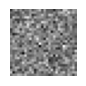

2024-06-28 05:36:06.940941: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 121, Generator Loss: 2.5654613971710205, Discriminator Loss: 1.0295675992965698


2024-06-28 05:36:11.836910: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 122, Generator Loss: 3.23067569732666, Discriminator Loss: 0.7508807182312012


2024-06-28 05:36:16.649497: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 123, Generator Loss: 3.2072067260742188, Discriminator Loss: 0.8717890381813049


2024-06-28 05:36:21.203680: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 124, Generator Loss: 2.7895164489746094, Discriminator Loss: 0.8256341218948364


2024-06-28 05:36:26.212928: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 125, Generator Loss: 2.984312057495117, Discriminator Loss: 0.7548316717147827


2024-06-28 05:36:31.166271: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 126, Generator Loss: 2.587127685546875, Discriminator Loss: 1.1115081310272217


2024-06-28 05:36:36.240244: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 127, Generator Loss: 2.8603875637054443, Discriminator Loss: 0.7697063684463501


2024-06-28 05:36:41.304990: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 128, Generator Loss: 2.6291239261627197, Discriminator Loss: 0.7197170853614807


2024-06-28 05:36:46.307164: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 129, Generator Loss: 2.828514575958252, Discriminator Loss: 0.730292797088623
Epoch 130, Generator Loss: 2.86275053024292, Discriminator Loss: 0.8313160538673401


2024-06-28 05:36:51.105150: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


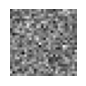

2024-06-28 05:36:55.965679: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 131, Generator Loss: 3.001913070678711, Discriminator Loss: 0.6480063796043396


2024-06-28 05:37:00.974824: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 132, Generator Loss: 3.20377779006958, Discriminator Loss: 0.7976893186569214


2024-06-28 05:37:05.735029: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 133, Generator Loss: 3.2982325553894043, Discriminator Loss: 0.8832138776779175


2024-06-28 05:37:10.677474: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 134, Generator Loss: 3.291055679321289, Discriminator Loss: 0.6214100122451782


2024-06-28 05:37:15.851331: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 135, Generator Loss: 3.17289400100708, Discriminator Loss: 0.757474422454834


2024-06-28 05:37:20.701960: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 136, Generator Loss: 3.493990421295166, Discriminator Loss: 0.6340934634208679


2024-06-28 05:37:25.499196: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 137, Generator Loss: 3.0427615642547607, Discriminator Loss: 0.7680374383926392


2024-06-28 05:37:30.537014: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 138, Generator Loss: 2.885557174682617, Discriminator Loss: 0.8430147171020508


2024-06-28 05:37:35.427206: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 139, Generator Loss: 2.946234703063965, Discriminator Loss: 0.7755650877952576
Epoch 140, Generator Loss: 3.0265889167785645, Discriminator Loss: 0.831760823726654


2024-06-28 05:37:40.353346: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


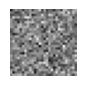

2024-06-28 05:37:45.060101: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 141, Generator Loss: 2.664790630340576, Discriminator Loss: 0.9696610569953918


2024-06-28 05:37:49.995449: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 142, Generator Loss: 2.6698451042175293, Discriminator Loss: 0.9326356053352356


2024-06-28 05:37:54.951104: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 143, Generator Loss: 2.46445369720459, Discriminator Loss: 0.8806134462356567


2024-06-28 05:38:00.058323: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 144, Generator Loss: 2.5244832038879395, Discriminator Loss: 0.8058063983917236


2024-06-28 05:38:04.894535: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 145, Generator Loss: 2.7347843647003174, Discriminator Loss: 0.8178380727767944


2024-06-28 05:38:09.939737: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 146, Generator Loss: 3.3628528118133545, Discriminator Loss: 0.6378945708274841


2024-06-28 05:38:14.604728: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 147, Generator Loss: 3.0472521781921387, Discriminator Loss: 0.7422679662704468


2024-06-28 05:38:19.334017: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 148, Generator Loss: 3.0111002922058105, Discriminator Loss: 0.9499887228012085


2024-06-28 05:38:24.173237: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 149, Generator Loss: 3.0178494453430176, Discriminator Loss: 1.040367841720581
Epoch 150, Generator Loss: 3.465712547302246, Discriminator Loss: 0.7834891080856323


2024-06-28 05:38:29.058166: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


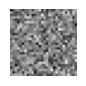

2024-06-28 05:38:34.083365: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 151, Generator Loss: 3.365551471710205, Discriminator Loss: 0.8520287871360779


2024-06-28 05:38:39.012968: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 152, Generator Loss: 3.2864482402801514, Discriminator Loss: 0.8941478729248047


2024-06-28 05:38:43.939582: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 153, Generator Loss: 3.5163755416870117, Discriminator Loss: 0.6803872585296631


2024-06-28 05:38:48.858990: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 154, Generator Loss: 3.641050338745117, Discriminator Loss: 0.5703873634338379


2024-06-28 05:38:53.796502: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 155, Generator Loss: 3.5560457706451416, Discriminator Loss: 0.7914066910743713


2024-06-28 05:38:58.865198: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 156, Generator Loss: 3.2080328464508057, Discriminator Loss: 0.7468202710151672


2024-06-28 05:39:03.499062: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 157, Generator Loss: 3.44195556640625, Discriminator Loss: 0.7497363090515137


2024-06-28 05:39:08.119337: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 158, Generator Loss: 3.050455093383789, Discriminator Loss: 0.8488022685050964


2024-06-28 05:39:12.917449: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 159, Generator Loss: 3.2494359016418457, Discriminator Loss: 0.7346542477607727
Epoch 160, Generator Loss: 3.031972885131836, Discriminator Loss: 0.8226257562637329


2024-06-28 05:39:17.615140: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


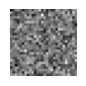

2024-06-28 05:39:22.348682: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 161, Generator Loss: 2.831209659576416, Discriminator Loss: 0.8696656823158264


2024-06-28 05:39:27.144827: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 162, Generator Loss: 2.98127818107605, Discriminator Loss: 0.9729968905448914


2024-06-28 05:39:32.043441: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 163, Generator Loss: 3.3652257919311523, Discriminator Loss: 0.7716646194458008


2024-06-28 05:39:36.872520: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 164, Generator Loss: 3.1890149116516113, Discriminator Loss: 0.70440673828125


2024-06-28 05:39:41.846403: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 165, Generator Loss: 3.3065083026885986, Discriminator Loss: 0.7540258765220642


2024-06-28 05:39:46.637965: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 166, Generator Loss: 2.9256675243377686, Discriminator Loss: 0.85330730676651


2024-06-28 05:39:51.654879: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 167, Generator Loss: 3.0916433334350586, Discriminator Loss: 0.7778929471969604


2024-06-28 05:39:56.499064: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 168, Generator Loss: 2.896740674972534, Discriminator Loss: 0.7855685353279114


2024-06-28 05:40:00.871129: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 169, Generator Loss: 2.296146869659424, Discriminator Loss: 1.066183090209961
Epoch 170, Generator Loss: 2.601759195327759, Discriminator Loss: 0.8149803876876831


2024-06-28 05:40:05.006517: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


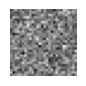

2024-06-28 05:40:09.342082: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 171, Generator Loss: 3.2707366943359375, Discriminator Loss: 0.6275149583816528


2024-06-28 05:40:14.236356: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 172, Generator Loss: 2.921250343322754, Discriminator Loss: 0.7488588690757751


2024-06-28 05:40:19.086926: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 173, Generator Loss: 3.068439483642578, Discriminator Loss: 0.786212682723999


2024-06-28 05:40:24.076346: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 174, Generator Loss: 2.747917413711548, Discriminator Loss: 0.816034197807312


2024-06-28 05:40:29.108582: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 175, Generator Loss: 2.821959972381592, Discriminator Loss: 0.8668404817581177


2024-06-28 05:40:34.057666: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 176, Generator Loss: 3.009359836578369, Discriminator Loss: 0.8740257024765015


2024-06-28 05:40:39.125260: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 177, Generator Loss: 2.7808780670166016, Discriminator Loss: 0.8839881420135498


2024-06-28 05:40:44.224165: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 178, Generator Loss: 2.774628162384033, Discriminator Loss: 0.8899382948875427


2024-06-28 05:40:48.970978: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 179, Generator Loss: 2.442574977874756, Discriminator Loss: 0.8736131191253662
Epoch 180, Generator Loss: 2.6003506183624268, Discriminator Loss: 0.765297532081604


2024-06-28 05:40:53.910397: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


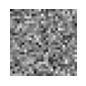

2024-06-28 05:40:58.635151: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 181, Generator Loss: 3.0373401641845703, Discriminator Loss: 0.8773608803749084


2024-06-28 05:41:03.617945: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 182, Generator Loss: 3.101076602935791, Discriminator Loss: 0.9506787061691284


2024-06-28 05:41:08.630058: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 183, Generator Loss: 2.9805073738098145, Discriminator Loss: 0.9148057103157043


2024-06-28 05:41:13.579912: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 184, Generator Loss: 3.466771364212036, Discriminator Loss: 0.8326318264007568


2024-06-28 05:41:18.483586: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 185, Generator Loss: 2.9651455879211426, Discriminator Loss: 0.9405066967010498


2024-06-28 05:41:23.561972: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 186, Generator Loss: 3.2549800872802734, Discriminator Loss: 0.942833423614502


2024-06-28 05:41:28.560955: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 187, Generator Loss: 3.097062826156616, Discriminator Loss: 0.9432253837585449


2024-06-28 05:41:33.581914: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 188, Generator Loss: 2.2013533115386963, Discriminator Loss: 0.89545738697052


2024-06-28 05:41:38.577208: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 189, Generator Loss: 2.7200307846069336, Discriminator Loss: 0.8116206526756287
Epoch 190, Generator Loss: 2.654711961746216, Discriminator Loss: 0.8132947683334351


2024-06-28 05:41:43.725459: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


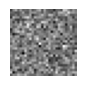

2024-06-28 05:41:48.860745: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 191, Generator Loss: 2.6964774131774902, Discriminator Loss: 0.994821310043335


2024-06-28 05:41:53.831575: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 192, Generator Loss: 3.028012752532959, Discriminator Loss: 0.8234620094299316


2024-06-28 05:41:58.916667: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 193, Generator Loss: 2.7117838859558105, Discriminator Loss: 0.805077850818634


2024-06-28 05:42:03.912932: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 194, Generator Loss: 2.827460289001465, Discriminator Loss: 0.76603102684021


2024-06-28 05:42:08.820540: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 195, Generator Loss: 3.0463547706604004, Discriminator Loss: 0.8985683917999268


2024-06-28 05:42:13.480335: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 196, Generator Loss: 3.0299506187438965, Discriminator Loss: 0.9380031228065491


2024-06-28 05:42:18.454723: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 197, Generator Loss: 2.5605545043945312, Discriminator Loss: 0.9331214427947998


2024-06-28 05:42:23.405302: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 198, Generator Loss: 2.461878538131714, Discriminator Loss: 0.9216858744621277


2024-06-28 05:42:28.410107: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 199, Generator Loss: 2.502026081085205, Discriminator Loss: 1.0540354251861572
Epoch 200, Generator Loss: 2.9203131198883057, Discriminator Loss: 0.8502710461616516


2024-06-28 05:42:33.591687: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


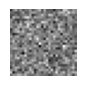

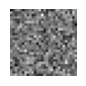

In [30]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 


# Prepare the MNIST dataset
batch_size = 256
mnist_dataset = prepare_dataset(X, batch_size)

# Train the GAN
epochs = 200

# Define the directory where images will be saved
save_directory = 'training_images_' + str(epochs) + '_epochs_time_' + str(int(time.time()))

model_save_directory = 'saved_models'
loss_save_file = 'training_losses.npz'

# Create the directories if they don't exist
if not os.path.exists(model_save_directory):
    os.makedirs(model_save_directory)
    


train(mnist_dataset, epochs, save_directory, model_save_directory, loss_save_file)


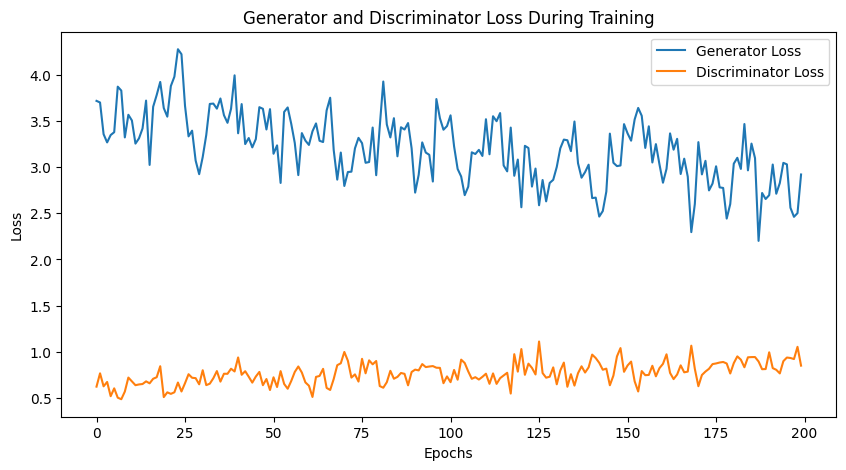

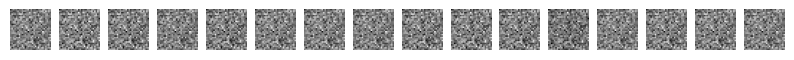

In [34]:
plot_losses(loss_save_file)

num_images_to_generate = 16

generator = keras.models.load_model('saved_models/generator_epoch_0200latent_space_size2.h5')


generate_images(generator, num_images_to_generate, latent_space_size)




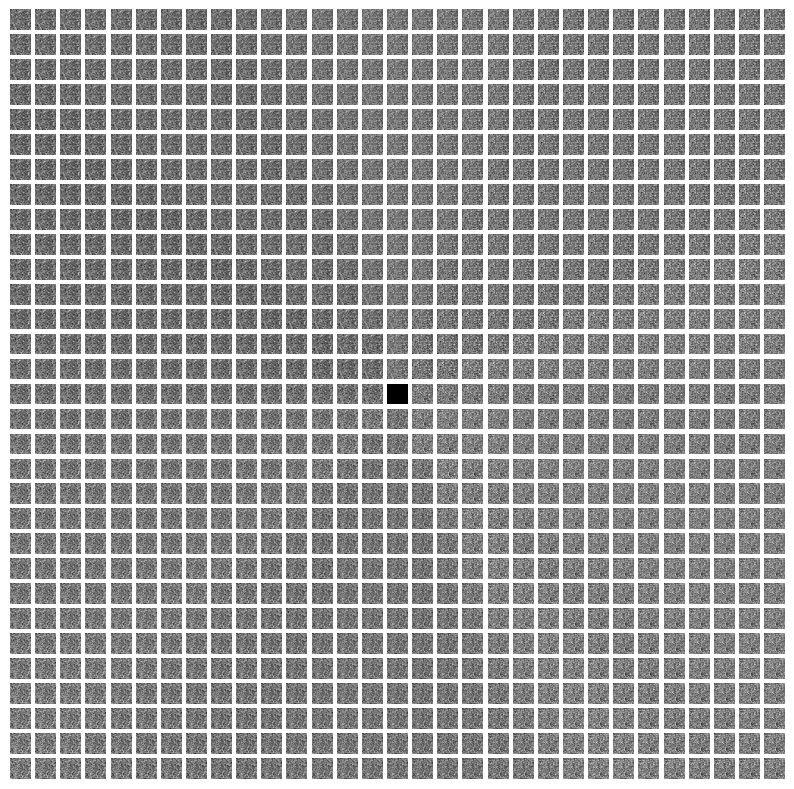

In [35]:
# Plotting the representation of the latent space
def plot_latent_space(generator_model, latent_space_size, num_points=1000):
    # Generate points in the latent space
    x = np.linspace(-1, 1, int(np.sqrt(num_points)))
    y = np.linspace(-1, 1, int(np.sqrt(num_points)))
    x, y = np.meshgrid(x, y)
    z = np.column_stack((x.flatten(), y.flatten()))

    # Generate images using the points in the latent space
    generated_images = generator_model(z, training=False)

    fig, axes = plt.subplots(int(np.sqrt(num_points)), int(np.sqrt(num_points)), figsize=(10, 10))

    for i, ax in enumerate(axes.flatten()):
        ax.imshow(generated_images[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
        ax.axis('off')

    plt.show()

plot_latent_space(generator, latent_space_size)
